In [1]:
import pandas as pd
import numpy as np

## Reading in the data

In [9]:
'''
file_names = [
    '7A_fy1991_fy1999_current_8.csv',
    '7A_fy2000_fy2009_current_8.csv',
    '7A_fy2010_fy2019_current_8.csv',
    '7A_fy2020_fy2023_current_8.csv'
]
'''
df = pd.read_csv('7A_fy2020_fy2023_current_8.csv', low_memory=False)


In [10]:
print(df.head(5), '\n\n', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182469 entries, 0 to 182468
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AsOfDate               182469 non-null  int64  
 1   Program                182469 non-null  object 
 2   BorrName               182467 non-null  object 
 3   BorrStreet             182469 non-null  object 
 4   BorrCity               182469 non-null  object 
 5   BorrState              182469 non-null  object 
 6   BorrZip                182469 non-null  int64  
 7   BankName               182469 non-null  object 
 8   BankFDICNumber         164739 non-null  float64
 9   BankNCUANumber         5384 non-null    float64
 10  BankStreet             182466 non-null  object 
 11  BankCity               182466 non-null  object 
 12  BankState              182466 non-null  object 
 13  BankZip                182466 non-null  float64
 14  GrossApproval          182465 non-nu

## Dropping the unwanted attributes

In [11]:
columns_to_keep = [
    'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip',
    'BankName', 'BankFDICNumber', 'BankNCUANumber', 'BankStreet',
    'BankCity', 'BankState', 'BankZip','SOLDSECMRTIND','ApprovalDate','ApprovalFiscalYear','GrossApproval'
]

df1 = df[columns_to_keep]

print("DataFrame (df1) with only the desired columns:")
print(df1)

DataFrame (df1) with only the desired columns:
                              BorrName                      BorrStreet  \
0        Allen Foot and Ankle Medicine     2919 S ELLSWORTH RD STE 124   
1               Cojutepeque Restaurant                   2610 W 3rd St   
2                             Adwa LLC  3105 ALDERWOOD MALL BLVD Suite   
3                        Town Cleaners         2700 WASHINGTON BLVD #B   
4                            Moor Inc.                 524 WOODSIDE RD   
...                                ...                             ...   
182464         Good News Ventures Inc.                 2982 Trueman Ct   
182465              Our Delta Wash LLC                 111 N Highway 6   
182466        Spring City Pharmacy LLC             101 N Walnut Street   
182467  Eighty-Seven Inc. Retirement P       1408 Northland Dr Ste 103   
182468                  Dafoe Law PLLC             160 S Main St Ste 4   

            BorrCity BorrState  BorrZip  \
0               MESA 

In [12]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182469 entries, 0 to 182468
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BorrName            182467 non-null  object 
 1   BorrStreet          182469 non-null  object 
 2   BorrCity            182469 non-null  object 
 3   BorrState           182469 non-null  object 
 4   BorrZip             182469 non-null  int64  
 5   BankName            182469 non-null  object 
 6   BankFDICNumber      164739 non-null  float64
 7   BankNCUANumber      5384 non-null    float64
 8   BankStreet          182466 non-null  object 
 9   BankCity            182466 non-null  object 
 10  BankState           182466 non-null  object 
 11  BankZip             182466 non-null  float64
 12  SOLDSECMRTIND       63955 non-null   object 
 13  ApprovalDate        182469 non-null  object 
 14  ApprovalFiscalYear  182469 non-null  int64  
 15  GrossApproval       182465 non-nul

## Considering the loans for the Fiscal Year 2023

In [13]:
fy2023 = df1[df1['ApprovalFiscalYear'] == 2023]
print(fy2023.head(5), '\n\n', len(fy2023) )

                              BorrName                   BorrStreet  \
141836  Empire Properties Investment L            1683 CATTLEMEN RD   
141837              First In Class LLC           333 N. Lagrange Rd   
141838             KEEP WALKING ON LLC                 249 SMITH ST   
141839               Chile Relleno LLC       194 East Carson Street   
141840  COAST TO COAST RESTORATION INC  1392 Poinsettia Ave Suite E   

              BorrCity BorrState  BorrZip  \
141836        SARASOTA        FL    34232   
141837  LA GRANGE PARK        IL    60526   
141838        BROOKLYN        NY    11231   
141839          Carson        CA    90745   
141840           VISTA        CA    92081   

                                      BankName  BankFDICNumber  \
141836                      First Chatham Bank         57252.0   
141837                             Byline Bank         20624.0   
141838                Brooklyn Cooperative FCU             NaN   
141839  CDC Small Business Finance Cor

In [14]:
null_counts = fy2023.isnull().sum()
print(null_counts)

BorrName                  0
BorrStreet                0
BorrCity                  0
BorrState                 0
BorrZip                   0
BankName                  0
BankFDICNumber         4229
BankNCUANumber        39547
BankStreet                3
BankCity                  3
BankState                 3
BankZip                   3
SOLDSECMRTIND         34390
ApprovalDate              0
ApprovalFiscalYear        0
GrossApproval             0
dtype: int64


## To check the number of data points sold on sec. market and then further filter out rows not sold on sec. market

In [15]:
unique_counts = fy2023['SOLDSECMRTIND'].value_counts(dropna=False)
print(unique_counts)

NaN    34390
Y       6243
Name: SOLDSECMRTIND, dtype: int64


In [16]:
fy2023_NS = fy2023[fy2023['SOLDSECMRTIND'].isna()]
print(len(fy2023_NS))

34390


## Checking if any duplicate entries for the same borrower and lenders with the same gross approval amount and the approval date

In [17]:
# checking for duplicate entries based on borrower and lender
duplicate_entries = fy2023_NS.duplicated(subset=['BorrName', 'GrossApproval', 'ApprovalDate', 'BorrCity', 'BankCity', 'BorrState', 'BankState'], keep=False)
# filtering the data to show only the duplicate entries
duplicate_entries_df = fy2023_NS[duplicate_entries]
# displaying the duplicate entries DataFrame
print(duplicate_entries_df)

                            BorrName                    BorrStreet  \
141860  Steady Flux Technologies LLC  1522/1520A and 1524 NW Balla   
141890  Steady Flux Technologies LLC  1522/1520A and 1524 NW Balla   
141961             Rupinderjit Singh            181 Eaton Ridge Dr   
141964    Goulet Custom Plumbing LLP          10034 Evening Sun Ct   
141965             Rupinderjit Singh            181 Eaton Ridge Dr   
...                              ...                           ...   
180368                       GNR INC              1813 30th Ave SW   
180459        Holt Machinery Company                504 Raritan St   
180461        Holt Machinery Company                504 Raritan St   
181069                  MJR Auto LLC         3900 Lake Drive Ave N   
181105                  MJR Auto LLC         3900 Lake Drive Ave N   

              BorrCity BorrState  BorrZip                      BankName  \
141860         Seattle        WA    98107  KeyBank National Association   
141890   

In [18]:
duplicate_entries_df.to_csv('2check.csv')

## Dropping the duplicate rows

In [19]:
# dropping duplicate entries based on borrower, lender, gross approval amount, and approval date
cleaned_fy2023 = fy2023_NS.drop_duplicates(subset=['BorrName', 'BankName', 'GrossApproval', 'ApprovalDate'])
print(cleaned_fy2023)
print(len(cleaned_fy2023))

                              BorrName                   BorrStreet  \
141836  Empire Properties Investment L            1683 CATTLEMEN RD   
141838             KEEP WALKING ON LLC                 249 SMITH ST   
141840  COAST TO COAST RESTORATION INC  1392 Poinsettia Ave Suite E   
141841                 Two Bananas LLC           47 Exchange Street   
141843                  Paradise 2 LLC            727 W. MADISON ST   
...                                ...                          ...   
182464         Good News Ventures Inc.              2982 Trueman Ct   
182465              Our Delta Wash LLC              111 N Highway 6   
182466        Spring City Pharmacy LLC          101 N Walnut Street   
182467  Eighty-Seven Inc. Retirement P    1408 Northland Dr Ste 103   
182468                  Dafoe Law PLLC          160 S Main St Ste 4   

           BorrCity BorrState  BorrZip  \
141836     SARASOTA        FL    34232   
141838     BROOKLYN        NY    11231   
141840        VISTA  

In [20]:
null_counts = cleaned_fy2023.isnull().sum()
print(null_counts)

BorrName                  0
BorrStreet                0
BorrCity                  0
BorrState                 0
BorrZip                   0
BankName                  0
BankFDICNumber         2727
BankNCUANumber        33251
BankStreet                3
BankCity                  3
BankState                 3
BankZip                   3
SOLDSECMRTIND         34235
ApprovalDate              0
ApprovalFiscalYear        0
GrossApproval             0
dtype: int64


## Checking for entries with no Bank Address/Zip and dropping these rows

In [21]:
rows_with_no_BankZip = cleaned_fy2023[cleaned_fy2023['BankZip'].isna()]
print("Rows with no BankZip:")
print(rows_with_no_BankZip)

Rows with no BankZip:
                             BorrName                BorrStreet     BorrCity  \
177018           Langner Holdings LLC  2931 S Washington Street    Englewood   
179823         Coston Enterprises Inc       18337 PENNINGTON RD  NOBLESVILLE   
180773  Mission Critical Systems Inc.  8601 Turnpike Drive #105  Westminster   

       BorrState  BorrZip           BankName  BankFDICNumber  BankNCUANumber  \
177018        CO    80113  MISSINGMAINBANKID             NaN             NaN   
179823        IN    46060  MISSINGMAINBANKID             NaN             NaN   
180773        CO    80031  MISSINGMAINBANKID             NaN             NaN   

       BankStreet BankCity BankState  BankZip SOLDSECMRTIND ApprovalDate  \
177018        NaN      NaN       NaN      NaN           NaN    5/26/2023   
179823        NaN      NaN       NaN      NaN           NaN    6/14/2023   
180773        NaN      NaN       NaN      NaN           NaN    6/21/2023   

        ApprovalFiscalYear  Gro

In [22]:
cleaned_fy2023 = cleaned_fy2023.dropna(subset=['BankZip'])
print(cleaned_fy2023)
print(len(cleaned_fy2023))

                              BorrName                   BorrStreet  \
141836  Empire Properties Investment L            1683 CATTLEMEN RD   
141838             KEEP WALKING ON LLC                 249 SMITH ST   
141840  COAST TO COAST RESTORATION INC  1392 Poinsettia Ave Suite E   
141841                 Two Bananas LLC           47 Exchange Street   
141843                  Paradise 2 LLC            727 W. MADISON ST   
...                                ...                          ...   
182464         Good News Ventures Inc.              2982 Trueman Ct   
182465              Our Delta Wash LLC              111 N Highway 6   
182466        Spring City Pharmacy LLC          101 N Walnut Street   
182467  Eighty-Seven Inc. Retirement P    1408 Northland Dr Ste 103   
182468                  Dafoe Law PLLC          160 S Main St Ste 4   

           BorrCity BorrState  BorrZip  \
141836     SARASOTA        FL    34232   
141838     BROOKLYN        NY    11231   
141840        VISTA  

In [23]:
cleaned_fy2023.to_csv('Cleaned_fy2023.csv')

## How often are small business borrowers and their SBA lenders located in their same city?

In [24]:
# counting the occurrences where borrower and lender are located in the same city
same_city_count = (cleaned_fy2023['BorrCity'] == cleaned_fy2023['BankCity']).sum()
# calculating the total number of observations
total_observations = len(cleaned_fy2023)
# calculating the percentage of borrowers and lenders located in the same city
percentage_same_city = (same_city_count / total_observations) * 100

print(f"The percentage of small business borrowers and their SBA lenders located in the same city is: {percentage_same_city:.2f}%")


The percentage of small business borrowers and their SBA lenders located in the same city is: 3.03%


## The percentage of small business borrowers and their SBA lenders located in the same city is: 3.03%

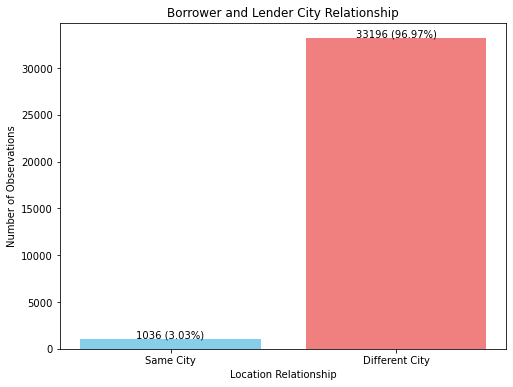

In [25]:
import matplotlib.pyplot as plt

# defining labels and values for the bar plot
labels = ['Same City', 'Different City']
values = [same_city_count, total_observations - same_city_count]

# creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'lightcoral'])
plt.title('Borrower and Lender City Relationship')
plt.xlabel('Location Relationship')
plt.ylabel('Number of Observations')

# displaying the percentage on top of each bar
for i, value in enumerate(values):
    plt.text(i, value + 100, f"{value} ({(value/total_observations*100):.2f}%)", ha='center')

# Show plot
plt.show()


## How often are small business borrowers and their SBA lenders located in their same state?

In [26]:
# counting the occurrences where borrower and lender are located in the same state
same_state_count = (cleaned_fy2023['BorrState'] == cleaned_fy2023['BankState']).sum()
# calculating the percentage of borrowers and lenders located in the same state
percentage_same_state = (same_state_count / total_observations) * 100

print(f"The percentage of small business borrowers and their SBA lenders located in the same state is: {percentage_same_state:.2f}%")


The percentage of small business borrowers and their SBA lenders located in the same state is: 34.46%


## The percentage of small business borrowers and their SBA lenders located in the same state is: 34.46%

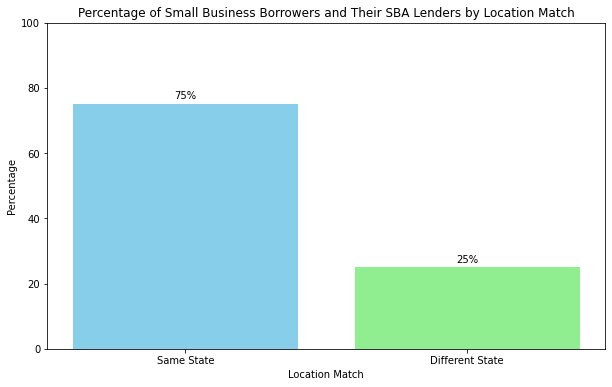

In [27]:
categories = ['Same State', 'Different State']
values = [75, 25]  # Replace these values with your actual data

# Creating the bar chart with a specified, reasonable figure size
plt.figure(figsize=(10, 6))  # Adjust the figsize if needed, but keep it reasonable
plt.bar(categories, values, color=['skyblue', 'lightgreen'])
plt.xlabel('Location Match')
plt.ylabel('Percentage')
plt.title('Percentage of Small Business Borrowers and Their SBA Lenders by Location Match')
plt.ylim(0, 100)  # Ensuring the y-axis starts at 0 and ends at 100 for clarity
for i, value in enumerate(values):
    plt.text(i, value + 1, f"{value}%", ha='center', va='bottom')
plt.show()

## How often are small business borrowers and their SBA lenders located within a 50 mile radius?

In [4]:
pip install geopy

     |████████████████████████████████| 125 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pyzipcode3

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pyzipcode import ZipCodeDatabase
from geopy.distance import geodesic

In [28]:
zcdb = ZipCodeDatabase()

def get_lat_long(zip_code):
    try:
        zip_info = zcdb[zip_code]
        return zip_info.latitude, zip_info.longitude
    except:
        return None, None

def calculate_distance(row):
    try:
        borr_zip = str(int(row['BorrZip']))
        bank_zip = str(int(row['BankZip']))
        borr_coords = get_lat_long(borr_zip)
        bank_coords = get_lat_long(bank_zip)

        if not all(borr_coords) or not all(bank_coords):
            return None

        distance = geodesic(borr_coords, bank_coords).miles
        return distance
    except Exception as e:
        print(f"Error processing row: {row}, Error: {e}")
        return None


cleaned_fy2023['ApproxDist'] = cleaned_fy2023.apply(lambda row: calculate_distance(row), axis=1)


print(cleaned_fy2023)

                              BorrName                   BorrStreet  \
141836  Empire Properties Investment L            1683 CATTLEMEN RD   
141838             KEEP WALKING ON LLC                 249 SMITH ST   
141840  COAST TO COAST RESTORATION INC  1392 Poinsettia Ave Suite E   
141841                 Two Bananas LLC           47 Exchange Street   
141843                  Paradise 2 LLC            727 W. MADISON ST   
...                                ...                          ...   
182464         Good News Ventures Inc.              2982 Trueman Ct   
182465              Our Delta Wash LLC              111 N Highway 6   
182466        Spring City Pharmacy LLC          101 N Walnut Street   
182467  Eighty-Seven Inc. Retirement P    1408 Northland Dr Ste 103   
182468                  Dafoe Law PLLC          160 S Main St Ste 4   

           BorrCity BorrState  BorrZip  \
141836     SARASOTA        FL    34232   
141838     BROOKLYN        NY    11231   
141840        VISTA  

#### Checking the rows with no distance values and dropping them

In [29]:
nan_count = cleaned_fy2023['ApproxDist'].isna().sum()
print(f"Number of rows with NaN in 'ApproxDist': {nan_count}")


Number of rows with NaN in 'ApproxDist': 4332


In [30]:
miles_df = cleaned_fy2023.dropna(subset=['ApproxDist'])
miles_df.reset_index(drop=True, inplace=True)
print(miles_df)
print(miles_df.info())


                             BorrName                   BorrStreet  \
0      Empire Properties Investment L            1683 CATTLEMEN RD   
1                 KEEP WALKING ON LLC                 249 SMITH ST   
2      COAST TO COAST RESTORATION INC  1392 Poinsettia Ave Suite E   
3                      Paradise 2 LLC            727 W. MADISON ST   
4                ACLZ Enterprises Inc        2217 BLOODS GROVE CIR   
...                               ...                          ...   
29895         Good News Ventures Inc.              2982 Trueman Ct   
29896              Our Delta Wash LLC              111 N Highway 6   
29897        Spring City Pharmacy LLC          101 N Walnut Street   
29898  Eighty-Seven Inc. Retirement P    1408 Northland Dr Ste 103   
29899                  Dafoe Law PLLC          160 S Main St Ste 4   

           BorrCity BorrState  BorrZip  \
0          SARASOTA        FL    34232   
1          BROOKLYN        NY    11231   
2             VISTA        CA    

## Calculating the proportion of data points with borrowers and their SBA lenders located within a 50 mile radius

In [31]:
# Calculate the number of rows where ApproxDist is less than or equal to 50 miles
rows_within_50_miles = miles_df[miles_df['ApproxDist'] <= 50].shape[0]

# Calculate the total number of rows in the DataFrame
total_rows = miles_df.shape[0]

# Calculate the percentage
percentage_within_50_miles = (rows_within_50_miles / total_rows) * 100

print(f"Number of rows with ApproxDist <= 50 miles: {rows_within_50_miles}")
print(f"Percentage of data with small business borrowers and their SBA lenders located within a 50 mile radius: {percentage_within_50_miles:.2f}%")


Number of rows with ApproxDist <= 50 miles: 5701
Percentage of data with small business borrowers and their SBA lenders located within a 50 mile radius: 19.07%


## Percentage of data with small business borrowers and their SBA lenders located within a 50 mile radius: 19.07%

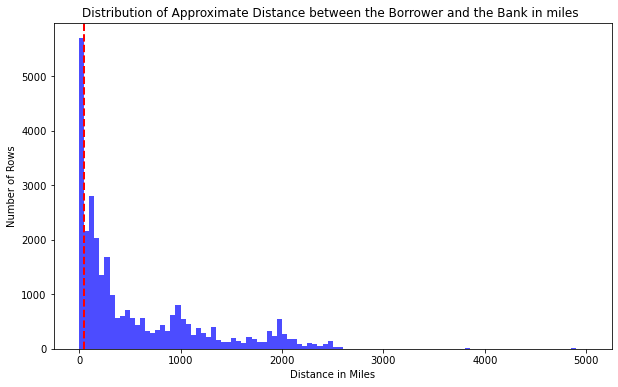

In [32]:
# creating the histogram
plt.figure(figsize=(10, 6))
plt.hist(miles_df['ApproxDist'], bins=range(0, int(max(miles_df['ApproxDist'])) + 50, 50), color='blue', alpha=0.7)

# highlighting the ≤50 miles range
plt.axvline(50, color='red', linestyle='dashed', linewidth=2)

# adding labels and title
plt.xlabel('Distance in Miles')
plt.ylabel('Number of Rows')
plt.title('Distribution of Approximate Distance between the Borrower and the Bank in miles ')


plt.show()


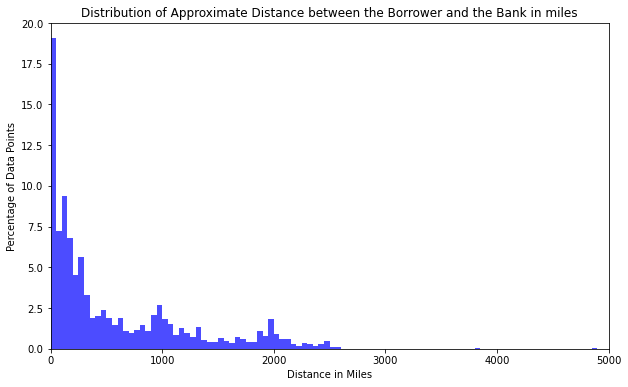

In [33]:
# defining bins for the histogram dynamically
max_distance = miles_df['ApproxDist'].max()
bin_width = 50  # Bin width of 50 miles
bins = np.arange(0, max_distance + bin_width, bin_width)  # Bins up to the maximum distance
hist_data, bin_edges = np.histogram(miles_df['ApproxDist'], bins=bins, density=True)

# converting the probability density to a percentage for each bin
bin_widths = np.diff(bin_edges)
hist_percentage = hist_data * bin_widths * 100  # Convert to percentage

# creating the histogram plot
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_percentage, width=bin_widths, alpha=0.7, align='edge', color='blue', label='Histogram')

# setting the range for x-axis
plt.xlim(0, bins[-1])

# adding labels and title
plt.xlabel('Distance in Miles')
plt.ylabel('Percentage of Data Points')
plt.title('Distribution of Approximate Distance between the Borrower and the Bank in miles')


plt.show()

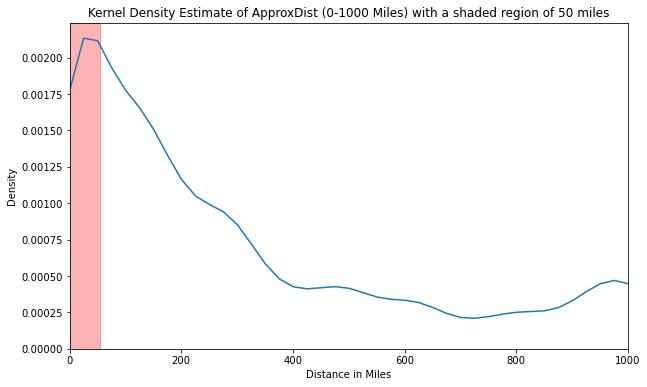

In [34]:
import seaborn as sns
# creating the KDE plot
plt.figure(figsize=(10, 6))
kde = sns.kdeplot(miles_df['ApproxDist'], bw_adjust=0.5, cut=0)

# finding the maximum density point
max_density_x = miles_df['ApproxDist'][np.argmax(kde.get_lines()[0].get_ydata())]

# highlight a range of 50 miles
small_range = 50  # defining the range width around the max density point
plt.axvspan(max_density_x - small_range, max_density_x + small_range, color='red', alpha=0.3)

# setting the range for x-axis
plt.xlim(0, 1000)

# adding labels and title
plt.xlabel('Distance in Miles')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of ApproxDist (0-1000 Miles) with a shaded region of 50 miles')

plt.show()

## Insights Drawn:

The analysis highlights a clear geographical relationship between small business borrowers and SBA lenders, with a considerable number of borrowers opting for lenders within close proximity, either in the same city or state, or within a 50-mile radius. This trend suggests a preference for localized borrowing-lending relationships in the small business sector.

## How does loan amount impact lending locality

In [35]:
locality_grouped = cleaned_fy2023.groupby('BorrCity')
loan_amounts_by_locality = locality_grouped['GrossApproval'].sum()

In [36]:
loan_amounts_stats = locality_grouped['GrossApproval'].describe()

print("Statistical Summary of Loan Amounts by Locality:")
print(loan_amounts_stats)

Statistical Summary of Loan Amounts by Locality:
                         count          mean           std       min  \
BorrCity                                                               
339112                     2.0  1.650000e+06  1.767767e+06  400000.0   
88-1860677                 1.0  2.000000e+04           NaN   20000.0   
8985 E Liberty North Rd    1.0  3.000000e+04           NaN   30000.0   
ABBEVILLE                  3.0  1.090667e+06  4.778190e+05  652300.0   
ABBOTTSTOWN                2.0  8.850000e+04  1.110158e+05   10000.0   
...                        ...           ...           ...       ...   
ravenna                    1.0  3.400000e+04           NaN   34000.0   
saginaw                    1.0  2.000000e+04           NaN   20000.0   
wadsworth                  1.0  1.850000e+05           NaN  185000.0   
willoughby hills           1.0  1.278000e+05           NaN  127800.0   
xenia                      2.0  3.405000e+04  2.255671e+04   18100.0   

              

In [37]:
loan_amount_by_state = df.groupby('BankState')['GrossApproval'].mean().reset_index()
print(loan_amount_by_state)

   BankState  GrossApproval
0         AK   7.426481e+05
1         AL   9.912610e+05
2         AR   6.825749e+05
3         AZ   7.034070e+05
4         CA   1.021047e+06
5         CO   7.672589e+05
6         CT   4.416763e+05
7         DC   5.041150e+05
8         DE   2.289416e+05
9         FL   5.440011e+05
10        GA   1.162954e+06
11        GU   2.708957e+05
12        HI   7.339293e+04
13        IA   4.442923e+05
14        ID   5.537711e+05
15        IL   9.028446e+05
16        IN   6.738069e+05
17        KS   4.847111e+05
18        KY   3.875186e+05
19        LA   6.779176e+05
20        MA   3.857092e+05
21        MD   6.276643e+05
22        ME   1.923844e+05
23        MI   6.628154e+05
24        MN   4.365653e+05
25        MO   8.189388e+05
26        MS   5.161054e+05
27        MT   4.255536e+05
28        NC   1.082048e+06
29        ND   5.095029e+05
30        NE   4.830387e+05
31        NH   2.040184e+05
32        NJ   8.488514e+05
33        NM   8.637965e+05
34        NV   1.780

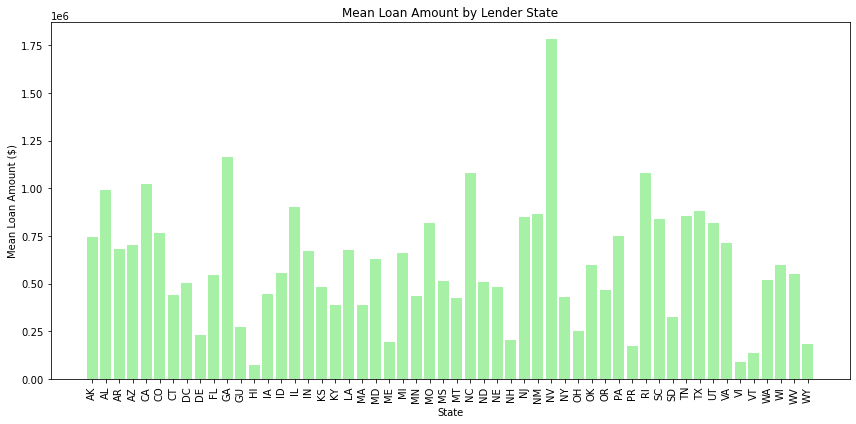

In [38]:
# Visualize mean loan amount by lender state
plt.figure(figsize=(12, 6))
plt.bar(loan_amount_by_state['BankState'], loan_amount_by_state['GrossApproval'], color='lightgreen', alpha=0.8)
plt.title('Mean Loan Amount by Lender State')
plt.xlabel('State')
plt.ylabel('Mean Loan Amount ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()